<a href="https://colab.research.google.com/github/belvdere/NeuralNetworkAssignment/blob/main/Belvedere_Song_Zheng_Yi_Part_B_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question B1 (15 marks)

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [ ]:
!pip install pytorch_tabular[extra]

In [ ]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

1.Divide the dataset (‘hdb_price_prediction.csv’) into train, validation and test sets by using entries from year 2019 and before as training data, year 2020 as validation data and year 2021 as test data.
**Do not** use data from year 2022 and year 2023.



In [ ]:
df = pd.read_csv('hdb_price_prediction.csv')

train_df = df[df["year"] <= 2019]
val_df = df[df["year"] == 2020]
test_df = df[df["year"] == 2021]

In [ ]:
train_df

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,ANG MO KIO,406 ANG MO KIO AVENUE 10,Ang Mo Kio,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,ANG MO KIO,108 ANG MO KIO AVENUE 4,Ang Mo Kio,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,ANG MO KIO,602 ANG MO KIO AVENUE 5,Yio Chu Kang,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,ANG MO KIO,465 ANG MO KIO AVENUE 10,Ang Mo Kio,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,ANG MO KIO,601 ANG MO KIO AVENUE 5,Yio Chu Kang,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64052,12,2019,YISHUN,326 YISHUN RING ROAD,Yishun,0.823163,14.421823,0.016807,0.000382,"EXECUTIVE, Apartment",67.583333,142.0,04 TO 06,580000.0
64053,12,2019,YISHUN,326 YISHUN RING ROAD,Yishun,0.823163,14.421823,0.016807,0.000382,"EXECUTIVE, Maisonette",67.583333,146.0,07 TO 09,565000.0
64054,12,2019,YISHUN,608 YISHUN STREET 61,Khatib,0.445869,13.498243,0.016807,0.000968,"EXECUTIVE, Apartment",71.500000,164.0,01 TO 03,633000.0
64055,12,2019,YISHUN,604 YISHUN STREET 61,Khatib,0.552769,13.598257,0.016807,0.000968,"EXECUTIVE, Apartment",71.500000,164.0,10 TO 12,788888.0


In [ ]:
val_df

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
64057,1,2020,ANG MO KIO,208 ANG MO KIO AVENUE 1,Ang Mo Kio,0.917344,7.336493,0.016807,0.006243,"3 ROOM, New Generation",55.583333,73.0,04 TO 06,265000.0
64058,1,2020,ANG MO KIO,307C ANG MO KIO AVENUE 1,Ang Mo Kio,0.696776,7.341622,0.016807,0.006243,"3 ROOM, Model A",91.666667,70.0,19 TO 21,470000.0
64059,1,2020,ANG MO KIO,319 ANG MO KIO AVENUE 1,Ang Mo Kio,0.597608,7.292217,0.016807,0.006243,"3 ROOM, New Generation",56.333333,73.0,01 TO 03,230000.0
64060,1,2020,ANG MO KIO,216 ANG MO KIO AVENUE 1,Ang Mo Kio,0.994153,7.427003,0.016807,0.006243,"3 ROOM, New Generation",55.250000,73.0,04 TO 06,280000.0
64061,1,2020,ANG MO KIO,556 ANG MO KIO AVENUE 10,Ang Mo Kio,0.921541,8.163605,0.016807,0.006243,"3 ROOM, New Generation",59.083333,68.0,07 TO 09,220000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87365,12,2020,YISHUN,352 YISHUN RING ROAD,Yishun,1.153544,14.075870,0.016807,0.000382,"EXECUTIVE, Maisonette",66.666667,146.0,04 TO 06,560000.0
87366,12,2020,YISHUN,356 YISHUN RING ROAD,Yishun,1.254784,13.948192,0.016807,0.000382,"EXECUTIVE, Apartment",66.750000,145.0,01 TO 03,540000.0
87367,12,2020,YISHUN,611 YISHUN STREET 61,Khatib,0.466763,13.426086,0.016807,0.000968,"EXECUTIVE, Apartment",66.000000,142.0,13 TO 15,638000.0
87368,12,2020,YISHUN,834 YISHUN STREET 81,Khatib,0.281375,12.884815,0.016807,0.000968,"EXECUTIVE, Maisonette",66.166667,146.0,10 TO 12,683500.0


In [ ]:
test_df

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
87370,1,2021,ANG MO KIO,170 ANG MO KIO AVENUE 4,Yio Chu Kang,1.276775,8.339960,0.016807,0.002459,"2 ROOM, Improved",64.083333,45.0,01 TO 03,211000.0
87371,1,2021,ANG MO KIO,170 ANG MO KIO AVENUE 4,Yio Chu Kang,1.276775,8.339960,0.016807,0.002459,"2 ROOM, Improved",64.083333,45.0,07 TO 09,225000.0
87372,1,2021,ANG MO KIO,331 ANG MO KIO AVENUE 1,Ang Mo Kio,0.884872,6.981730,0.016807,0.006243,"3 ROOM, New Generation",59.000000,68.0,04 TO 06,260000.0
87373,1,2021,ANG MO KIO,534 ANG MO KIO AVENUE 10,Ang Mo Kio,0.677246,8.333056,0.016807,0.006243,"3 ROOM, New Generation",58.166667,68.0,04 TO 06,265000.0
87374,1,2021,ANG MO KIO,561 ANG MO KIO AVENUE 10,Ang Mo Kio,0.922047,8.009223,0.016807,0.006243,"3 ROOM, New Generation",58.083333,68.0,01 TO 03,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116422,12,2021,YISHUN,502B YISHUN STREET 51,Khatib,0.954699,13.018048,0.016807,0.000968,"5 ROOM, Improved",95.083333,112.0,13 TO 15,720000.0
116423,12,2021,YISHUN,877 YISHUN STREET 81,Khatib,0.475885,12.738721,0.016807,0.000968,"EXECUTIVE, Apartment",65.083333,142.0,01 TO 03,738000.0
116424,12,2021,YISHUN,824 YISHUN STREET 81,Khatib,0.408137,12.745325,0.016807,0.000968,"EXECUTIVE, Maisonette",65.000000,146.0,04 TO 06,755000.0
116425,12,2021,YISHUN,348A YISHUN AVENUE 11,Yishun,0.733238,14.183095,0.016807,0.000382,"5 ROOM, DBSS",90.916667,112.0,10 TO 12,848000.0


2.Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [ ]:
data_config = DataConfig(
    target=["resale_price"],
    continuous_cols =["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality", "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"],
    categorical_cols =["month", "town", "flat_model_type", "storey_range"],
)

trainer_config = TrainerConfig(
    auto_lr_find = True,
    batch_size=1024,
    max_epochs=50,
  )


model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers=50,
)


optimizer_config = OptimizerConfig(
    optimizer="Adam",
)


tabular_model = TabularModel(
    data_config=data_config,
    model_config = model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

tabular_model.fit(train=train_df, validation=val_df)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
/usr/local/lib/python3.10/dist-packages/pytorch_tabular/categorical_encoders.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.10/dist-packages/pytorch_tabular/categorical_encoders.py:67:

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.5754399373371567
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_a969b074-08b8-4377-a1da-7105784fbe21.ckpt
/usr/local/lib/python3.10/dist-packages/lightning_fabric/utilities/cloud_io.py:56: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by th

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │
│ 2 │ head             │ LinearHead                │     51 │
│ 3 │ loss             │ MSELoss                   │      0 │
└───┴──────────────────┴───────────────────────────┴────────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
/usr/local/lib/python3.10/dist-packages/pytorch_tabular/utils/python_utils.py:84: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please op

3.Report the test RMSE error and the test R2 value that you obtained.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

pred_df = tabular_model.predict(test=test_df)

pred_df["resale_price"] = test_df["resale_price"].values # Append the testing set retail price (ground truths)

pred_df


/usr/local/lib/python3.10/dist-packages/pytorch_tabular/categorical_encoders.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.10/dist-packages/pytorch_tabular/categorical_encoders.py:67: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

,resale_price_prediction,resale_price
87370,136601.50000,211000.0
87371,166652.90625,225000.0
87372,299092.68750,260000.0
87373,294914.81250,265000.0
87374,266336.78125,265000.0
...,...,...
116422,574844.00000,720000.0
116423,574533.56250,738000.0
116424,636705.56250,755000.0
116425,691219.81250,848000.0


In [ ]:
y = pred_df["resale_price"]
pred = pred_df["resale_price_prediction"]

rmse = np.sqrt(mean_squared_error(y, pred))
print("RMSE: ", rmse)

r_squared = r2_score(y, pred)
print("R-squared: ", r_squared)



RMSE:  80411.26831594757
R-squared:  0.7555578632548294


4.Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. Identify a trend in these poor predictions and suggest a way to reduce these errors.



In [ ]:
pred_df["Absolute_loss"] = abs(y-pred)
sorted_df = pred_df.sort_values("Absolute_loss", ascending=False)


top = sorted_df[0:25]
top

,resale_price_prediction,resale_price,Absolute_loss
92405,360914.7500,780000.0,419085.2500
105372,561211.6875,975000.0,413788.3125
106192,560444.9375,968000.0,407555.0625
105869,535871.5625,930000.0,394128.4375
106057,574577.0625,958000.0,383422.9375
105695,549269.4375,930000.0,380730.5625
105696,583298.4375,950000.0,366701.5625
92442,799522.0000,1165000.0,365478.0000
105702,869783.5000,1235000.0,365216.5000
105699,670265.9375,1032888.0,362622.0625


In [ ]:
# Calculate the mean of the resale price and predicted price
mean_resale_price = pred_df["resale_price"].mean()
mean_prediction = pred_df["resale_price_prediction"].mean()

# Calculate the median of the resale price and predicted price
median_resale_price = pred_df["resale_price"].median()
median_prediction = pred_df["resale_price_prediction"].median()

# Print the results
print("Mean Resale Price: ", mean_resale_price)
print("Mean Prediction: ", mean_prediction)
print("Median Resale Price: ", median_resale_price)
print("Median Prediction: ", median_prediction)


Mean Resale Price:  511417.39377189666
Mean Prediction:  455211.62
Median Resale Price:  483000.0
Median Prediction:  441981.4375


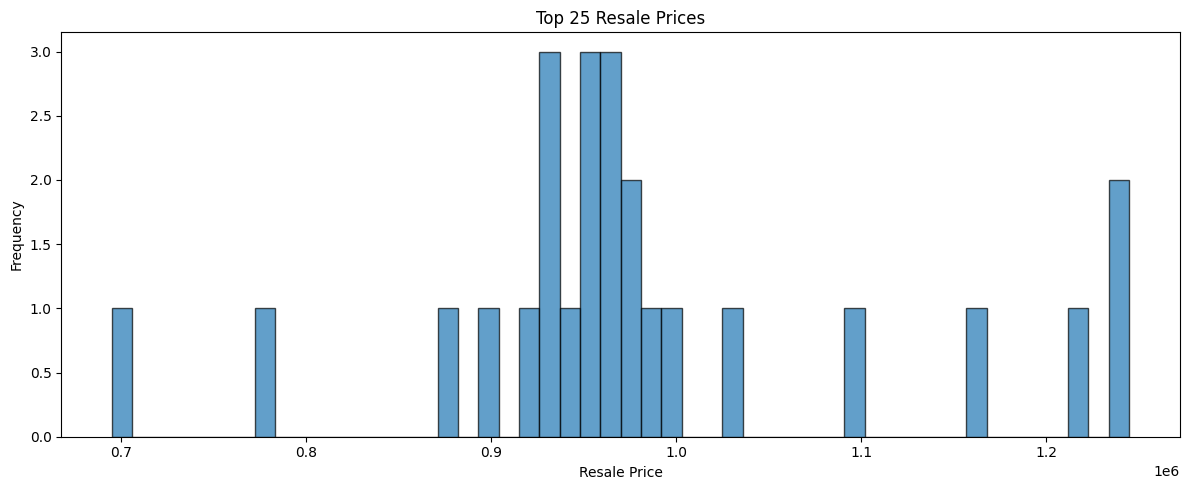

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

ax1.hist(top["resale_price"], bins=25, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Resale Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Top 25 Resale Prices')

plt.tight_layout()
plt.show()

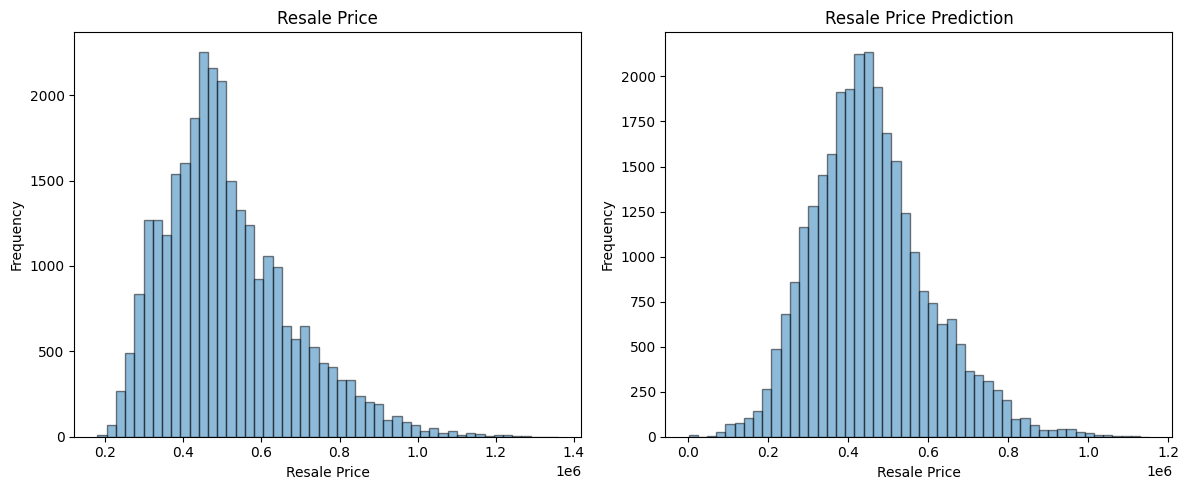

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(pred_df["resale_price"], bins=50, alpha=0.5, edgecolor='black')
ax1.set_xlabel('Resale Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Resale Price')

ax2.hist(pred_df["resale_price_prediction"], bins=50, alpha=0.5, edgecolor='black')
ax2.set_xlabel('Resale Price')
ax2.set_ylabel('Frequency')
ax2.set_title('Resale Price Prediction')

plt.tight_layout()
plt.show()

From the First diagram, we can see that the histrogram, we can see that the Top 25 samples with the largest error is above the mean and the medium of the resale prices.

On further data visualisation, we can see that the original data is right skewed. This implies that there are fewer high-value resale prices, and a bulk of the data is concentrated in the lower range.

While the prediction for the resale price follows relatively similar to a uniform distribution which means that it may struggle to capture the extreme values in the higher resale price ranges (the right tail).

The right skewed data leads to poorer generalisation for high resale prices as the model is not train sufficiently to deal with those, hence leading to the poor prediction results for high resale price.

To reduce the error, we can
1. Rebalance the training data
- such as up-sample high resale price data points or down sample the low resale prices
- use SMOTE to improve the representation of the high-value resale prices

2. Log Transformation of the Target Variables
- applying log transformation will make the data more normally distributed
